In [9]:
import pandas as pd
import folium
import geopandas
import matplotlib.pyplot as plt
from folium import Figure

In [3]:
fig = Figure(width=800, height=400)
mapa = folium.Map(location=[-34.60361373973094, -58.38169521687419], zoom_start=13, titles='cartodbpositron')
fig.add_child(mapa)

In [4]:
geo_meshblock = geopandas.read_file('../radios_censales/RADIOS_2010_v2021.shp')

In [4]:
geo_meshblock.head()

COD_2010 PROV_ DEPTO_ FRACC_ RADIO_ CODAGLO_1 CODAGLO_2 CODAGLO_3  \
0  068051304    06    805     13     04      0001       NaN       NaN   
1  066381605    06    638     16     05      0001       NaN       NaN   
2  066381604    06    638     16     04      0001       NaN       NaN   
3  067490513    06    749     05     13      0001       NaN       NaN   
4  067490402    06    749     04     02      0001       NaN       NaN   

  CODAGLO_4 CODAGLO_5                                           geometry  
0       NaN       NaN  POLYGON ((-58.63525 -34.44988, -58.63649 -34.4...  
1       NaN       NaN  POLYGON ((-58.91819 -34.46289, -58.91811 -34.4...  
2       NaN       NaN  MULTIPOLYGON (((-58.91558 -34.46721, -58.91550...  
3       NaN       NaN  POLYGON ((-58.55800 -34.44501, -58.55807 -34.4...  
4       NaN       NaN  POLYGON ((-58.54955 -34.44414, -58.54955 -34.4...

In [5]:
geo_meshblock.count()

COD_2010     52406
PROV_        52406
DEPTO_       52406
FRACC_       52406
RADIO_       52406
CODAGLO_1    42591
CODAGLO_2      118
CODAGLO_3       26
CODAGLO_4        8
CODAGLO_5        1
geometry     52406
dtype: int64

In [6]:
df_caba = geo_meshblock[geo_meshblock.PROV_ == '02']
gdf_caba = geopandas.GeoDataFrame(data=df_caba, geometry='geometry')

In [5]:
folium.GeoJson(
    data=gdf_caba,
    style_function=lambda x:{
        "color": "red",
        "opacity": 0.8,
        "fillColor": "orange",
        "fillOpacity": 0.4
    }
).add_to(mapa)

NameError: name 'gdf_caba' is not defined

In [8]:
mapa

In [6]:
meshblock_map = folium.Map(location=[-34.602756,-58.368375], zoom_start=17, titles=None)
df_meshblock_0200 = geo_meshblock[geo_meshblock.COD_2010 == '020010914']
gdf_meshblock_0200 = geopandas.GeoDataFrame(data=df_meshblock_0200, geometry='geometry')
folium.GeoJson(
    data=gdf_meshblock_0200,
    style_function=lambda x:{
        "color": "red",
        "opacity": 0.8,
        "weight": 1.5,
        "fillColor": "lightpurple",
        "fillOpacity": 0.4
    }
).add_to(meshblock_map)


In [10]:
print(type(df_meshblock_0200))

<class 'geopandas.geodataframe.GeoDataFrame'>


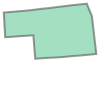

In [11]:
df_meshblock_0200.geometry.all()

In [7]:
df_meshblock_0200.geometry.to_crs(crs="EPSG:4326")

50578    POLYGON ((-58.36864 -34.60044, -58.36839 -34.6...
Name: geometry, dtype: geometry

In [13]:
fig1 = Figure(width=800, height=400)
fig1.add_child(meshblock_map)

In [14]:
meshblock_map = folium.Map(location=[-34.602756,-58.368375], zoom_start=17, titles=None)
folium.TileLayer('CartoDB positron', overlay=True, show=True, control=False).add_to(meshblock_map)
geo = folium.Choropleth(geo_data=df_meshblock_0200).add_to(meshblock_map)

geo.geojson.style_function=lambda x:{
        "color": "red",
        "opacity": 0.7,
        "fillColor": "orange",
        "fillOpacity": 0.2
    }
geo.add_to(meshblock_map)
fig2 = Figure(width=800, height=400)
fig2.add_child(meshblock_map)

In [15]:
# Add custom base maps to folium
basemaps = {
    'Google Maps': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Maps',
        overlay = True,
        control = True
    ),
    'Google Satellite': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Google Terrain': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Terrain',
        overlay = True,
        control = True
    ),
    'Google Satellite Hybrid': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Esri Satellite': folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = True,
        control = True
    )
}

# Add custom basemaps
# basemaps['Google Maps'].add_to(sub_mapa)
basemaps['Google Satellite Hybrid'].add_to(meshblock_map)
# basemaps['Esri Satellite'].add_to(sub_mapa)

In [16]:
meshblock_map

In [17]:
def get_meshblock_map(lat:float, lon:float, meshblock_id:str):
    meshblock_map = folium.Map(
        location=[lat, lon], 
        zoom_start=16.2,
        zoom_control=False,
        titles=None
    )
    df_meshblock = geo_meshblock[geo_meshblock.COD_2010 == meshblock_id]
    gdf_meshblock_filter = geopandas.GeoDataFrame(data=df_meshblock, geometry='geometry')
    popup = folium.GeoJsonPopup(fields=["COD_2010"])
    folium.GeoJson(
        data=gdf_meshblock_filter,
        style_function=lambda feature:{
            "color": "red",
            "opacity": 0.8,
            "fillColor": "blue",
            "fillOpacity": 0.2
        },
        popup=popup
    ).add_to(meshblock_map)
    # folium.Marker(
    #     [lat, lng], 
    #     popup=meshblock_id, 
    #     icon=folium.Icon(color='lightred'),
    # ).add_to(meshblock_map)
    basemaps['Google Satellite Hybrid'].add_to(meshblock_map)
    # folium.LayerControl(collapsed=False).add_to(meshblock_map)
    return meshblock_map

In [18]:
my_map = get_meshblock_map(lat = -34.596443153219155, lon = -58.39315346829054, meshblock_id = '020020707')
my_map

In [19]:
olivos413_map = get_meshblock_map(-34.50542793835259, -58.478667875112784, '068610402')
olivos413_map

In [20]:
pd.set_option('display.max_colwidth', None)
# lat = -34.596443153219155, lon = -58.39315346829054
df_meshblock_0200

COD_2010 PROV_ DEPTO_ FRACC_ RADIO_ CODAGLO_1 CODAGLO_2 CODAGLO_3  \
50578  020010914    02    001     09     14      0001       NaN       NaN   

      CODAGLO_4 CODAGLO_5  \
50578       NaN       NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               geometry  
50578  POLYGON ((-58.36864 -34.60044, -58.36839 -34.60103, -58.36831 -34.60170, -58.36818 -34.60283, -58.36840 -34.60285, -58.36901 -34.60291, -58.36919 -34.60292, -58.36994 -34.60299, -58.37008 -34.60300, -58.37027 -34.60301, -58.37048 -34.60302, -58.37062 -34.60303, -58.37109 -34.60306, -58.37117 -34.60206, -58.37118 -34.60195, -58.37131 -34.60195, -58.37239 -34.60203, -58.37252 -34.60204, -58.37253 -34.60193, -58.37258 -34.60096, -58.37259 -34.60086, -58.37248 -34.60085, -58.37136 -34.60075, -58.37127 -34.60074, -58.37070 -34.60067, -58.37066 -34.60067, -58.37051 -34.60066, -58.37035 -34.60064, -58.36932 -34.60051, -58.36864 -34.60044))

In [21]:
df_meshblock_0200.geometry.bounds

minx      miny       maxx       maxy
50578 -58.372593 -34.60306 -58.368184 -34.600439

In [22]:
geometry_series = geopandas.GeoSeries(df_meshblock_0200['geometry'], crs="EPSG:4326")
geometry_series

50578    POLYGON ((-58.36864 -34.60044, -58.36839 -34.60103, -58.36831 -34.60170, -58.36818 -34.60283, -58.36840 -34.60285, -58.36901 -34.60291, -58.36919 -34.60292, -58.36994 -34.60299, -58.37008 -34.60300, -58.37027 -34.60301, -58.37048 -34.60302, -58.37062 -34.60303, -58.37109 -34.60306, -58.37117 -34.60206, -58.37118 -34.60195, -58.37131 -34.60195, -58.37239 -34.60203, -58.37252 -34.60204, -58.37253 -34.60193, -58.37258 -34.60096, -58.37259 -34.60086, -58.37248 -34.60085, -58.37136 -34.60075, -58.37127 -34.60074, -58.37070 -34.60067, -58.37066 -34.60067, -58.37051 -34.60066, -58.37035 -34.60064, -58.36932 -34.60051, -58.36864 -34.60044))
Name: geometry, dtype: geometry

In [23]:
# get bounds
bounds = df_meshblock_0200.geometry.bounds

lon_min = bounds['minx'] # Lon min
lat_min = bounds['miny'] # Lat min
lon_max = bounds['maxx'] # Lon max
lat_max = bounds['maxy'] # Lat Max

In [24]:
def generate_meshblock_map(meshblock_id:str, zoom_start:float=16.2):
    """
    Generates a map based on the given coordinates (latitude and longitude) 
    and the census meshblock identifier from to RADIOS_2010_v2021.shp.

    Parameters:
    - lat (float): Latitude of the map.
    - lon (float): Longitude of the map.
    - meshblock_id (str): Identifier of the census meshblock to visualize.
    - zoom_start (float, optional): Initial zoom level of the map.

    Returns:
    - meshblock_map (folium.Map): Generated map object with the highlighted meshblock.

    """
    try:
        
        df_meshblock_filtered = geo_meshblock[geo_meshblock.COD_2010 == meshblock_id]
        
        bounds = df_meshblock_filtered.geometry.bounds
        lon_min = bounds['minx']
        lat_min = bounds['miny']
        lon_max = bounds['maxx']
        lat_max = bounds['maxy']
        
        center_bound = [(lat_min + lat_max) / 2, (lon_min + lon_max) / 2]
            
        meshblock_map = folium.Map(
            location=center_bound, 
            zoom_start=zoom_start,
            zoom_control=False,
            titles=None
        )
        
        gdf_meshblock_filter = geopandas.GeoDataFrame(
            data=df_meshblock_filtered, geometry='geometry'
        )
        
        popup = folium.GeoJsonPopup(fields=["COD_2010"])
        
        folium.GeoJson(
            data=gdf_meshblock_filter,
            style_function=lambda feature:{
                "color": "red",
                "opacity": 1,
                "fillColor": "blue",
                "fillOpacity": 0.3
            },
            popup=popup
        ).add_to(meshblock_map)
        
        basemaps['Google Satellite Hybrid'].add_to(meshblock_map)    
    
        if meshblock_map:
            meshblock_map.save(f'./public/meshblock_map/{meshblock_id}.html')
            
        return meshblock_map
    
    except Exception as exc:
        print(f'meshblock: {meshblock_id} does not exist, verify. Exc: {exc}')
        return None

In [25]:
test_map = generate_meshblock_map(meshblock_id = '068051405')
test_map
